**Варіант №1**


**Завдання 1**

In [52]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

diabetes_df['target'] = diabetes.target

diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


1. Вивести перших 5 рядків.

In [2]:
diabetes_df.head(5)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.

In [103]:
diabetes_df.isnull().sum()
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

diabetes_df.isnull().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


3. Перевірити наявність дублікатів, при виявленні – видалити

In [45]:
duplicates = diabetes_df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «Вік» спочатку перевірте
унікальні значення.

In [106]:
print("Унікальні значення в стовпці 'age':")
diabetes_df['age'].unique()

Унікальні значення в стовпці 'age':


array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.04534098, -0.05273755,
       -0.00551455,  0.07076875, -0.0382074 , -0.02730979, -0.04910502,
       -0.0854304 , -0.06363517, -0.06726771, -0.10722563, -0.02367725,
        0.05260606,  0.06713621, -0.06000263,  0.03444337,  0.03081083,
        0.04897352,  0.01264814, -0.00914709, -0.09996055,  0.01991321,
       -0.05637009, -0.07816532, -0.04183994,  0.05987114, -0.03457486,
       -0.03094232, -0.10359309, -0.01641217,  0.00175052, -0.02004471,
        0.0562386 ,  0.02354575,  0.0090156 , -0.07453279, -0.01277963,
       -0.08179786,  0.08166637,  0.11072668,  0.09256398,  0.07440129,
        0.07803383,  0.09619652,  0.08893144])

5. Перевірити тип даних. При необхідності замінити тив даних на
числовий.

In [107]:
print("Типи даних:")
diabetes_df.dtypes

Типи даних:


,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.

Кореляція:
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


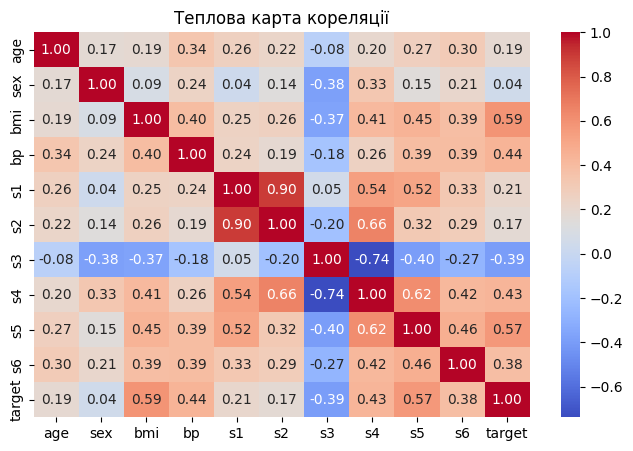

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

correlation = diabetes_df.corr()
target_correlation = correlation['target'].drop('target')

print("Кореляція:")
print(target_correlation.sort_values(ascending=False))

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Теплова карта кореляції')
plt.show()

7. Масштабувати ознаки

In [110]:
from sklearn.preprocessing import StandardScaler

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=diabetes.feature_names)
scaled_df['target'] = diabetes_df['target']

scaled_df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


8. Поділити дані на тренувальну і тестову вибірки.

In [22]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('target', axis=1)
y = scaled_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Тренувальна вибірка: {X_train.shape[0]} рядків")
print(f"Тестова вибірка: {X_test.shape[0]} рядків")

Тренувальна вибірка: 353 рядків
Тестова вибірка: 89 рядків


9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптисальне число).

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

correlation = scaled_df.corr()
target_correlation = correlation['target'].drop('target').abs()

num_features = 5
top_features = target_correlation.nlargest(num_features).index
X = scaled_df[top_features]
y = scaled_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Лінійна регресія: {mse_lin}")
print(f"Модель RandomForest: {mse_rf}")


Лінійна регресія: 2936.4837818705073
Модель RandomForest: 3067.5746168539326


10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.


In [87]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)


Лінійна регресія: MSE = 3424.259334298692 , R2 = 0.3322332173106184
Random Forest регресія: MSE = 3876.2592752808987 , R2 = 0.2440884487931676


11. Побудувати графіки.


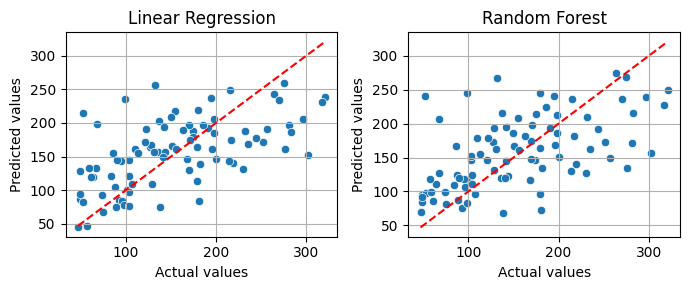

In [98]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

best_models = {
    'Linear Regression': lin_model,
    'Random Forest Regressor': rf_model
}

plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()


**Висновки**

Провели аналіз даних датасету Diabetes Dataset та перевіряли його різними способами. Обчислили кореляцію між прогресом діабету і іншмим ознаками, побудували теплову карту до цього. Поділили дані на тренувальну та тестову вибірки.  Побудували модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак, вивели коефіцієнт детермінації і середньоквадратичну помилку. В кінці ми побудували відповідні графіки.


______________________________________________________


**Завдання 2**

Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії.

In [99]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Перші 5 рядків:")
df.head()

Перші 5 рядків:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Провести попередній аналіз даних за схемою (дивиться вище)

In [114]:
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [115]:

df.duplicated().sum()

0

In [116]:
df.dtypes


,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


2. Масштабувати ознаки

In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


3. Поділити дані на тренувальні і тестові.


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Тренувальні: {X_train.shape[0]}")
print(f"Тестові: {X_test.shape[0]}")

Тренувальні: 16512
Тестові: 4128


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.

In [153]:
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid_rf = {'n_estimators': [50], 'max_depth': [10]}
param_grid_ridge = {'alpha': [1]}
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Random Forest': (RandomForestRegressor(), param_grid_rf),
    'Ridge Regression': (Ridge(), param_grid_ridge)
}

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R^2 = {r2:.4f}")


Linear Regression: MSE = 0.5559, R^2 = 0.5758
Random Forest: MSE = 0.2962, R^2 = 0.7740
Ridge Regression: MSE = 0.5559, R^2 = 0.5758


5. Вивести R
2 I MSE. Побудувати графіки.

Linear Regression: MSE = 0.5559, R^2 = 0.5758
Random Forest: MSE = 0.2980, R^2 = 0.7726
Ridge Regression: MSE = 0.5559, R^2 = 0.5758


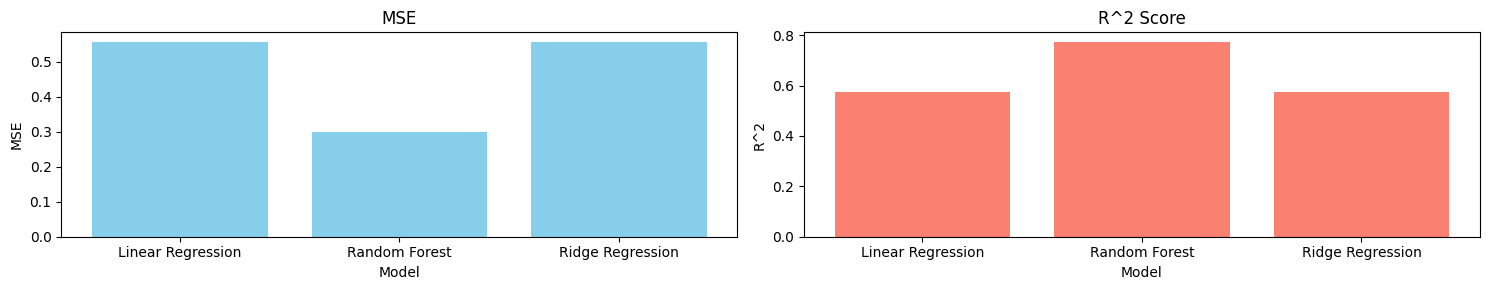

In [148]:
results = {'Model': [], 'MSE': [], 'R^2': []}

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R^2'].append(r2)

    print(f"{name}: MSE = {mse:.4f}, R^2 = {r2:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

#MSE
ax[0].bar(results['Model'], results['MSE'], color='skyblue')
ax[0].set_title('MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Model')

# R²
ax[1].bar(results['Model'], results['R^2'], color='salmon')
ax[1].set_title('R^2 Score')
ax[1].set_ylabel('R^2')
ax[1].set_xlabel('Model')

plt.tight_layout()
plt.show()

**Висновки**

Попрацювали з датасетом California Housing Dataset виконуючи різні дії, з яких: аналіз даних, ділення даних на тренквальні та тестові, побудовано 3 моделі, виведено R^2 і MSE.